<a href="https://colab.research.google.com/github/hansonnguy/MAT-421/blob/main/Module_A.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

HW 1 - Hanson Nguyen

**9.1 Base-N and Binary**


---


Various number systems represent numbers in ways that might be more useful for a particular application. The decimal, or base-10 number system, is used in standard counting. To represent digital values in transistors, the binary, or base-2, number system, which contain only 0's and 1's, is used as the number system in computers. This module demonstrates how to convert from decimal to binary.

In [4]:
# Base-10 decomposition into base-2
# ex. 134 (base-10)
134 == 1*(2**7) + 0*(2**6) + 0*(2**5) + 0*(2**4) + 0*(2**3) + 1*(2**2) + 1*(2**1) + 0*(2**0)

True

In [5]:
# function that converts decimal to binary
def base10tobase2(num):
  if(num>1):
    base10tobase2(num//2)
  print(num%2, end='')

# function that convers binary to decimal
def base2tobase10(num):
  digits = list(str(num))
  digits.reverse()
  value = 0
  for i in range(len(digits)):
    value = value + int(digits[i])*(2**i)
  return int(value)

138

In [18]:
# confirm function works properly, using example above
base2tobase10('10000110')

134

In [17]:
base10tobase2(134)

10000110

In [20]:
# Adding in binary:
# ex. 010101 + 011001 = 101110
#     21 + 25 = 46
base2tobase10('010101') + base2tobase10('011001') == base2tobase10('101110')

True

In [22]:
# Multiplying in binary:
# ex. 0101 * 0011 = 1111
#     5 * 3 = 15
base2tobase10('0101') * base2tobase10('0011') == base2tobase10('1111')

True

**9.2 Floating Point Numbers**

---


In the IEEE754 standard, 64 bits are allocated to represent floating point numbers. The allocation of these bits are:


*   1 bit $(s)$ for the sign of the number (positive or negative)
*   11 bits $(e)$ for the exponent as a power of 2 (normalized by subtracting 1023)
*   52 bits $(f)$ for the fraction/mantissa

The following equation is used to obtain the full number, $n$:

$n = (-1)^s(2^{(e-1023)})(1+f)$



In [23]:
# IEEE754 example
# 1 10000000101 1100000100000000000000000000000000000000000000000000 = -112.25
-112.25 == (-1)**1 * (2**((1*2**10 + 1*2**2 + 1*2**0) - 1023)) * (1 + 1*2**-1 + 1*2**-2 + 1*2**-8)

True

In [71]:
# function that converts IEEE754 to decimal
def IEEE754tobase10(num):
  digits = str(num)
  s = base2tobase10(digits[0])
  e = base2tobase10(digits[1:12])
  m = base2tobase10mantissa(digits[12:])
  return (-1**s)*2**(e-1023)*(1+m)

# function that converts mantissa to decimal
def base2tobase10mantissa(num):
  digits = list(str(num))
  value = 0
  for i in range(len(digits)):
    value = value + int(digits[i])*(2**-(i+1))
  return value

In [72]:
# confirm function works properly, using example above
IEEE754tobase10('1100000001011100000100000000000000000000000000000000000000000000') == -112.25

True

In [2]:
# we can find the max value that can be interpretted with IEEE754
import sys
import numpy as np
largest = (2**(2046-1023))*((1 + sum(0.5**np.arange(1, 53))))
sys.float_info.max == largest

True

In [3]:
# we can find the min value that can be interpretted with IEEE754
smallest = (2**(1-1023))*(1+0)
sys.float_info.min == smallest

True

Since the mantissa is limited in the number of bits, there is a finite distance, or a **gap**, between sequential numbers. Values that are less than this gap will have no impact on the final result

In [3]:
import numpy as np
np.spacing(1e9)
1e9 == (1e9 + np.spacing(1e9)/3)

True

In [10]:
# this gap increases with the number being represented. For instance, 2 is several orders of magnitude less than the maximum IEEE754 number, and is thus less than the gap at this value
sys.float_info.max + 2 == sys.float_info.max

True

In [11]:
# numbers larger than the max are interpretted as positive infinity
sys.float_info.max + sys.float_info.max

inf

In [12]:
# numbers that are smaller than the smallest subnormal number (2^{1-1023}*2^{-52} = 2^-1074) are interpretted as 0, as shown in the next two cells
2**(-1075) == 0.0

True

In [13]:
2**(-1074) == 0.0

False

**9.3 Round-off Errors**

---

A round off number is the difference between the finite number computed in the IEEE754 numbering scheme and the actual solution of an arithmetic. Round off errors appear in a few different forms:


*   Representation errors occur when a value in IEEE754 is different than an actual intended value. For instance, $\pi$ will have a round off error as it is is in irrational number that will have an infinite number of decimal points. We are limited to the 52 mantissa bits in IEEE754, and thus there will be a representation error
*   Arithmetic errors occur when a floating point solution cannot be fully represented in IEEE754.
*   Accumulation errors arise from repreated calculations of numbers that form an error due to a representation or arithmetic error. These errors "accumulate" over time and become more significant over a large series of operations



In [7]:
# Representation error: the sqrt of 2 has a representation error, which we can see as the sqrt of 2 squared is expected to equal 2
(np.sqrt(2))**2 == 2

False

In [4]:
# Arithmetic Error: we see that a solution we expected to be true to turn out false. This is due to the limitation of a finite floating-point representation in IEEE754
8.9 - 8.845 == 0.055

False

In [5]:
# here is the value that is computed for, which is very close to our expected value
8.9 - 8.845

0.054999999999999716

In [16]:
# we can solve this issue by rounding to a desired decimal place. In this case, we could round up to the to 10^-15 place value
round(8.9 - 8.845, 15)  == 0.055

True

In [22]:
# Accumulation error: repeated caluculations using numbers that have a representation error can result in accumulated error.
# Here, when we run one iteration with pi, the representation error cancels with itself
1 + np.pi - np.pi

1.0

In [30]:
# define a function to run many additions and then many subtractions
def add_then_subtract(iterations, num):
    result = 1

    for i in range(iterations):
        result += num

    for i in range(iterations):
        result -= num
    return result

# define a function to run many additions and subtractions together
def add_and_subtract(iterations, num):
    result = 1

    for i in range(iterations):
        result += num
        result -= num
    return result

In [33]:
# If we accumulate the error first, we will see that there was some accumulated error
add_then_subtract(100, np.pi)

1.0000000000000213

In [38]:
# Running this more times, we see that the error accumalates more
add_then_subtract(1000, np.pi) - add_then_subtract(100, np.pi) > 0

True

In [32]:
# Alternatively, we can cancel out this error by adding and subtracted and repeating this many times
add_and_subtract(10000, np.pi)

1.0

Text(0.5, 1.0, 'Accumulated Error')

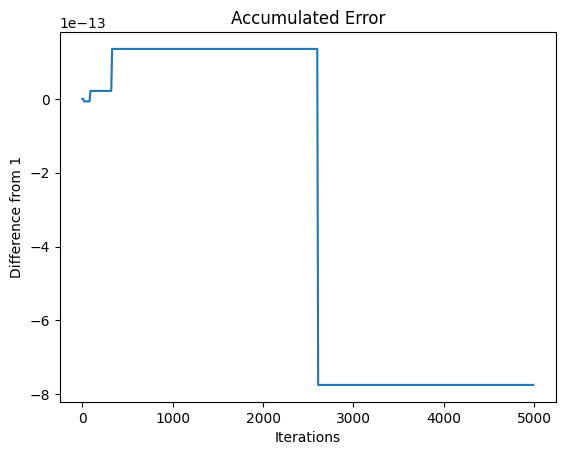

In [51]:
# We can see how this accumulates over more iterations with a plot:
import matplotlib.pyplot as plt
plt.plot(range(0,5000,10), [add_then_subtract(i, np.pi)-1 for i in range(0,5000,10)])
plt.xlabel('Iterations')
plt.ylabel('Difference from 1')
plt.title('Accumulated Error')